In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from eden.util import configure_logging
import logging
logger = logging.getLogger()
configure_logging(logger,verbosity=2)

In [2]:
#parameters for visualization
opts={'size':9, 'node_border':False, 'node_size':200, 'font_size':9, 'vertex_alpha':0.6,'title_key':'id'}

from eden.util.display import draw_graph, serialize_graph
import itertools
def plot(graphs, num=3, file_name=None, opts=None):    
    graphs = itertools.islice(graphs,num)
    for i,graph in enumerate(graphs): 
        if file_name is not None:
            draw_graph(graph, file_name=file_name+str(i)+'.png', **opts)
        else:
            draw_graph(graph, **opts)

In [3]:
def rfam_uri(family_id):
    return '%s.fa'%(family_id)
def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)

In [54]:
rfam_id = 'RF00005' #tRNA
rfam_id = 'RF00037'
rfam_id = 'RF01689'
rfam_id = 'RF00005'

In [59]:
%%time
from eden.converter.fasta import fasta_to_sequence
seqs = list(fasta_to_sequence(rfam_uri(rfam_id)))

from eden.RNA import Vectorizer
rnavec=Vectorizer(n_neighbors=30, min_energy=-10)
train_size=300
rnavec.fit(seqs[:train_size])

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF00005/alignment?acc=RF00005&format=fastau&download=0 HTTP/1.1" 200 90476
CPU times: user 1.5 s, sys: 29.6 ms, total: 1.53 s
Wall time: 1.87 s


In [60]:
#X = rnavec.transform(seqs[100:110])

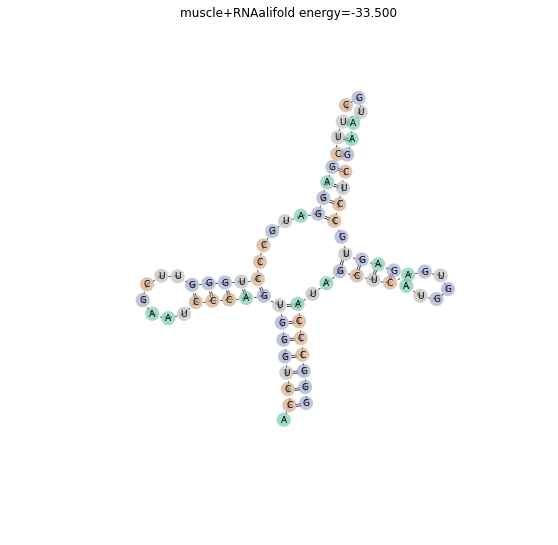

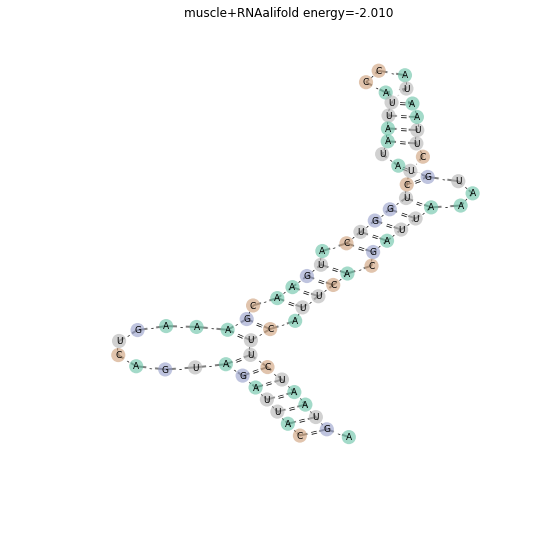

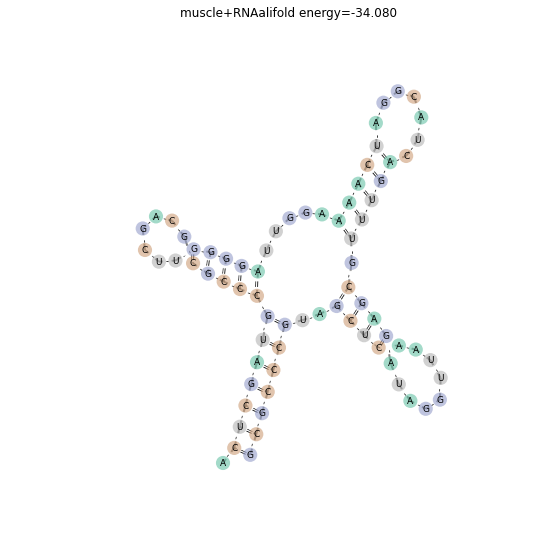

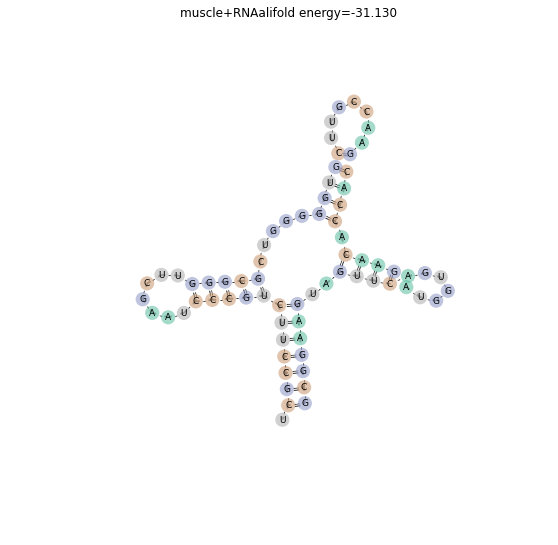

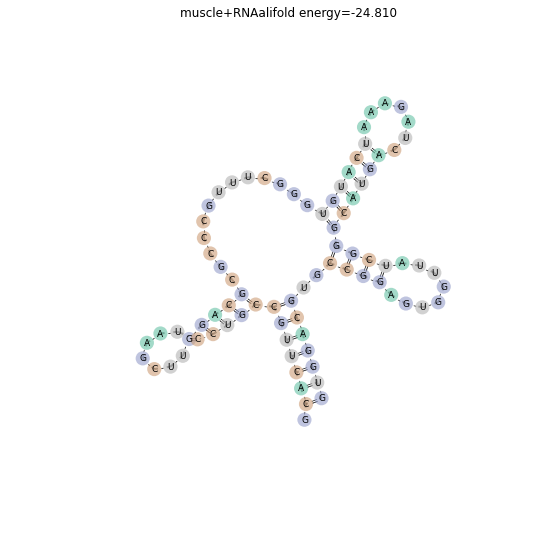

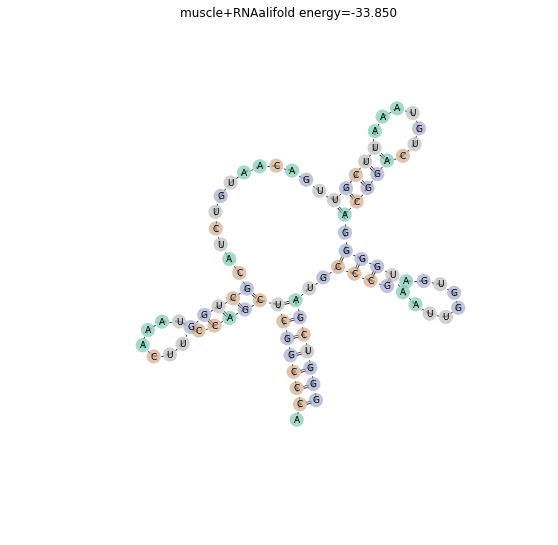

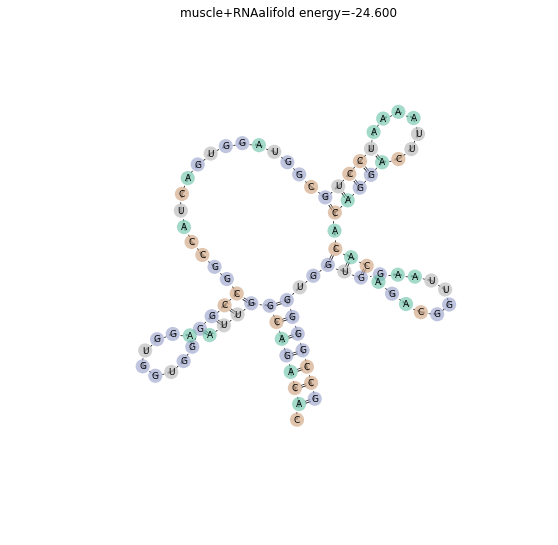

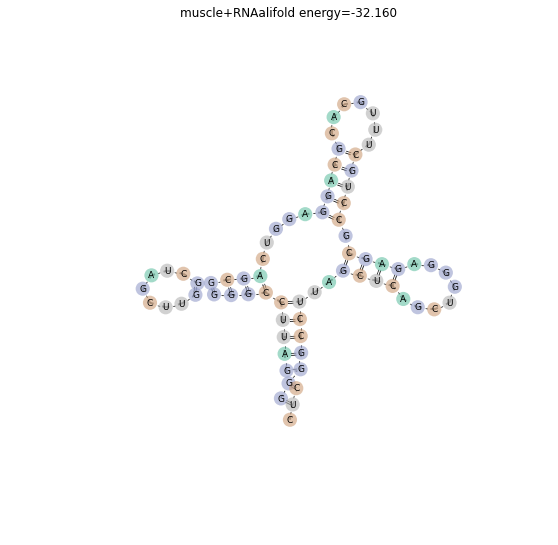

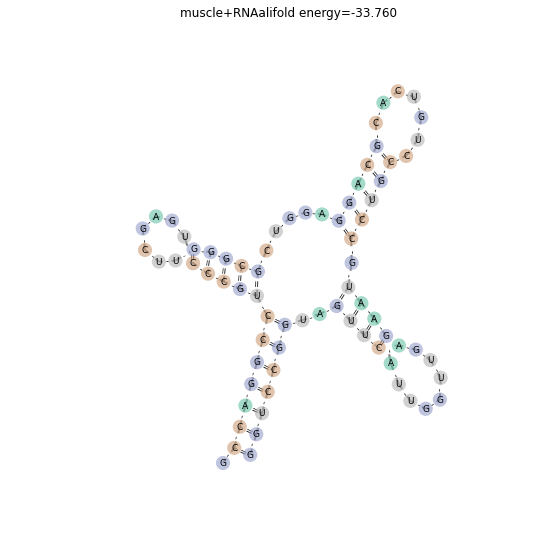

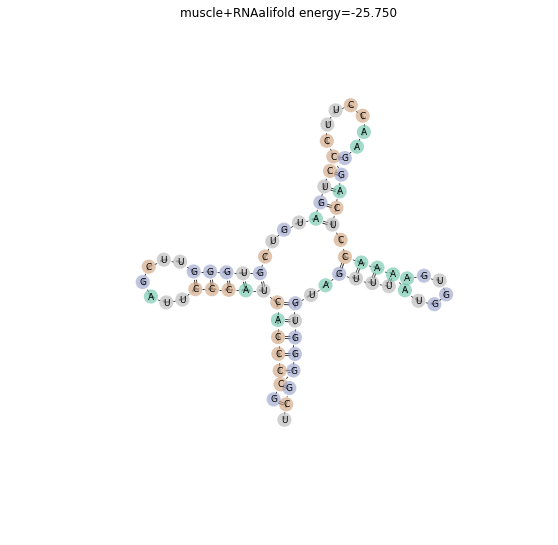

In [61]:
graphs = rnavec.graphs(seqs[300:320], sampling_prob=.1, n_iter=30)
my_opt=dict(opts)
my_opt.update({'vertex_color':'_labels_', 'colormap':'Set2', 'title_key':'info'})
plot(graphs,num=None,opts=my_opt)

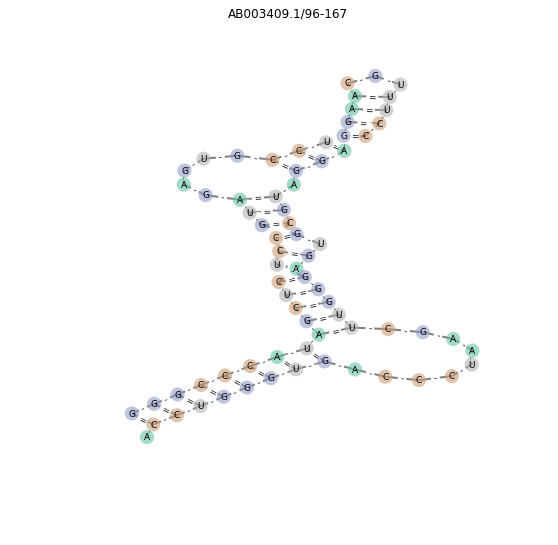

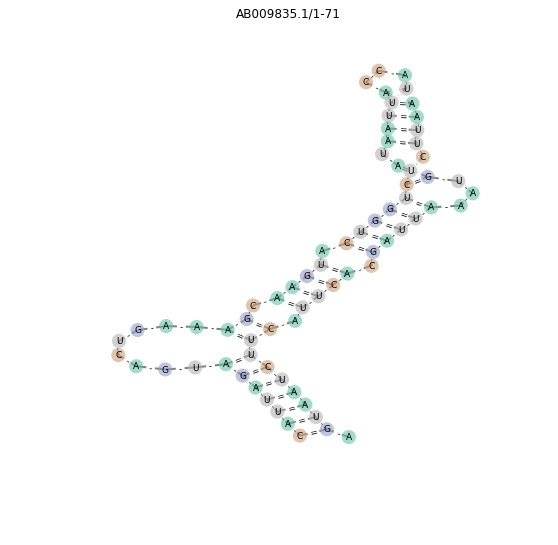

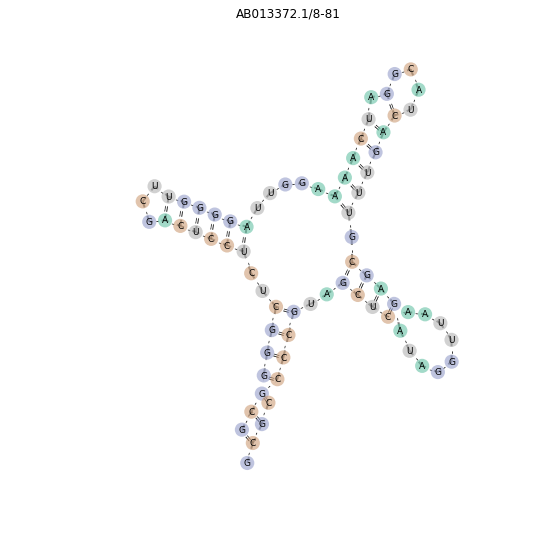

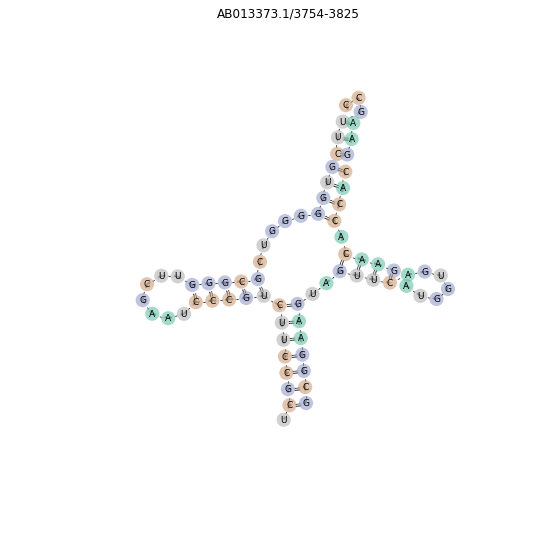

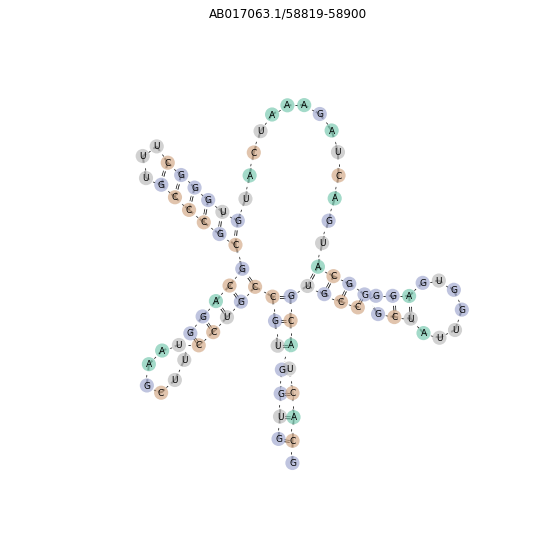

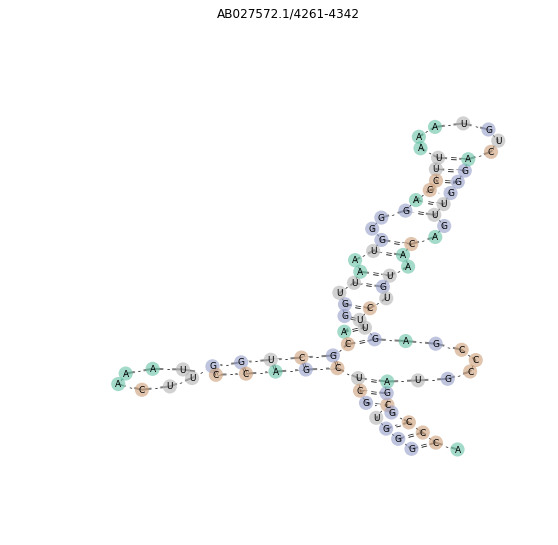

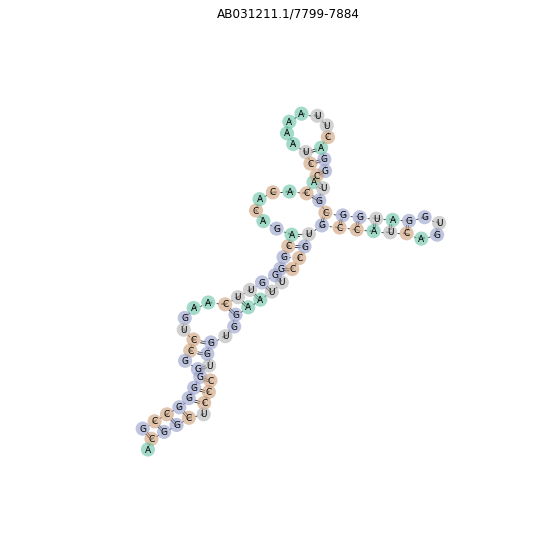

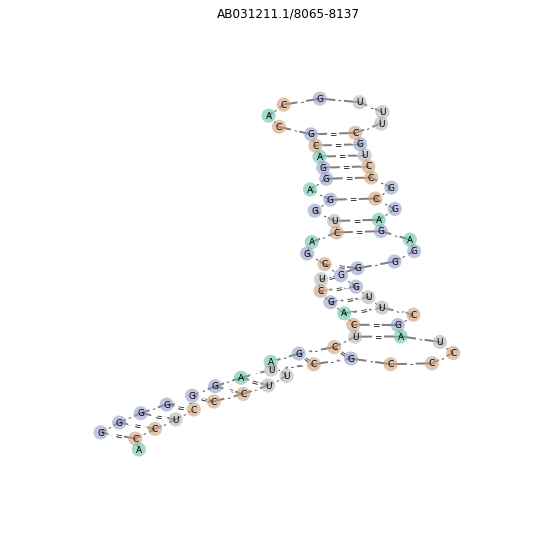

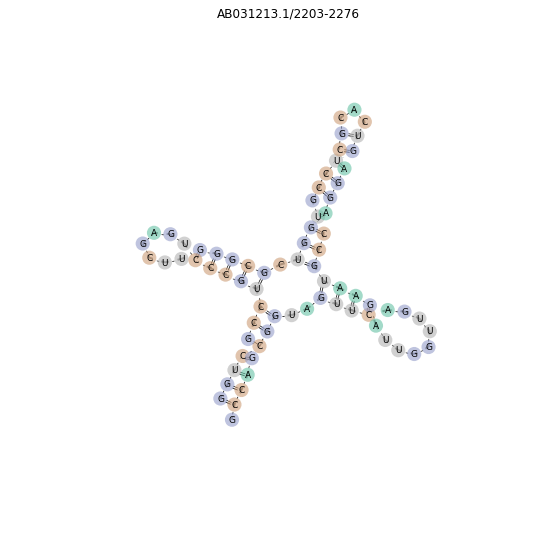

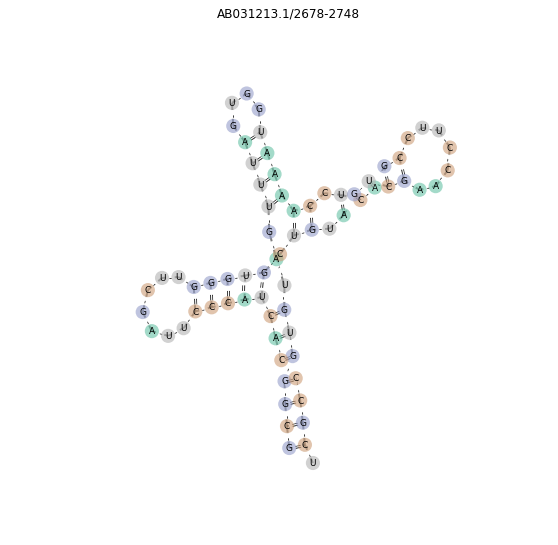

In [62]:
from eden.converter.rna.rnafold import rnafold_to_eden
graphs = rnafold_to_eden(seqs[:10])
my_opt=dict(opts)
my_opt.update({'vertex_color':'_labels_', 'colormap':'Set2'})
plot(graphs,num=None,opts=my_opt)

---